In [ ]:
# A/B test
# A mobile game is wondering if they should move the gate from level 30 to level 40. 
# The gate is a milestone in the game that forces the player to take a break.

In [ ]:
# Findings and Recomendations
# One day retention was very similar in both groups as the p-value >.05
# Seven day retention had a statistically significant drop
# This A/B test has shown that forcing a break earlier (at stage 30 rather than 40) has a statistically significant impact on 7-day retention.
# Do not move the gate from level 30 to level 40

In [3]:
import pandas as pd
import numpy as np
import statsmodels.stats.api as sms

# Define parameters
baseline_rate = 0.10  
practical_significance = 0.02  
target_rate = baseline_rate + practical_significance

# Calculate the Effect Size
effect_size = sms.proportion_effectsize(baseline_rate, target_rate)

# Set the statistical power and alpha
alpha = 0.05  
power = 0.80  

# Perform the Analysis
analysis = sms.NormalIndPower()
required_n = analysis.solve_power(
    effect_size=effect_size, 
    alpha=alpha, 
    power=power, 
    ratio=1.0, 
    alternative='two-sided'
)

print(f"Required sample size per group: {round(required_n)}")
print(f"Total visitors needed: {round(required_n) * 2}")

Required sample size per group: 3835
Total visitors needed: 7670


In [2]:
import pandas as pd

# Load the cats dataset
df = pd.read_csv('C:\Temp\cats.csv')

display(df.head())

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [3]:
#check for missing values
print(df.isnull().sum())

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64


In [18]:
conversion_rate_7 = df['retention_7'].mean()
conversion_rate_1 = df['retention_1'].mean()



print(round(conversion_rate_7,4))
print(round(conversion_rate_1,4))


0.1861
0.4452


In [4]:
# Find users who are in both groups
# We group by user_id and count how many unique groups they are in
user_counts = df.groupby('userid')['version'].nunique()
users_to_drop = user_counts[user_counts > 1].index

print(f"Number of users to drop (in both groups): {len(users_to_drop)}")

# Filter the dataframe to remove these users
df_clean = df[~df['userid'].isin(users_to_drop)]

# Double check the proportions (Sample Ratio Mismatch check)
print("\n--- Cleaned Group Proportions ---")
print(df_clean['version'].value_counts(normalize=True))

Number of users to drop (in both groups): 0

--- Cleaned Group Proportions ---
version
gate_40    0.504374
gate_30    0.495626
Name: proportion, dtype: float64


In [5]:
from statsmodels.stats.proportion import proportions_ztest

In [6]:
# Split the data into your two groups
gate_30 = df[df['version'] == 'gate_30']
gate_40 = df[df['version'] == 'gate_40']

# Count the 'successes' (people who returned)
successes = [gate_30['retention_1'].sum(), gate_40['retention_1'].sum()]
# Count the total number of players in each group
totals = [gate_30['retention_1'].count(), gate_40['retention_1'].count()]

# Run the Z-test
z_stat, p_value = proportions_ztest(successes, totals)

print(f'Z-statistic: {z_stat:.4f}')
print(f'P-value: {p_value:.4f}')

Z-statistic: 1.7841
P-value: 0.0744


In [7]:
# Count 'successes' (returned after 7 days) and totals
successes_7d = [gate_30['retention_7'].sum(), gate_40['retention_7'].sum()]
totals_7d = [gate_30['retention_7'].count(), gate_40['retention_7'].count()]

# Run the Z-test for 7-day retention
z_stat_7d, p_val_7d = proportions_ztest(successes_7d, totals_7d)

# Print results
print(f'7-Day Z-statistic: {z_stat_7d:.4f}')
print(f'7-Day P-value: {p_val_7d:.4f}')

# Calculate the percentage difference for context
rate_30 = gate_30['retention_7'].mean()
rate_40 = gate_40['retention_7'].mean()
lift = (rate_40 - rate_30) / rate_30

print(f'Gate 30 Retention: {rate_30:.2%}')
print(f'Gate 40 Retention: {rate_40:.2%}')
print(f'Relative Lift: {lift:.2%}')

7-Day Z-statistic: 3.1644
7-Day P-value: 0.0016
Gate 30 Retention: 19.02%
Gate 40 Retention: 18.20%
Relative Lift: -4.31%


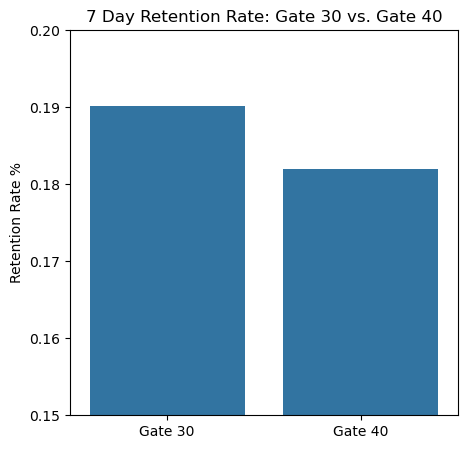

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
sns.barplot(x=['Gate 30', 'Gate 40'], y=[rate_30, rate_40])
plt.ylim(0.15, 0.20)
plt.title('7 Day Retention Rate: Gate 30 vs. Gate 40')
plt.ylabel('Retention Rate %')
plt.show()